# **1. CLONAR REPOSITORIO Y CREAR NOTEBOOK**

En primer lugar hemos clonado el repositorio de GitHub en una carpeta de mi Mac llamada PYTHON IA:

- git clone https://github.com/20rd1/actividad_github.git

Una vez clonado dentro de él creamos un nuevo archivo, en este caso será nuestro notebook:

-  MAGOMU.ipynb

NOTA: la extensión .ipynb corresponde a un archivo notebook.









## **2. IMPORTAR .CSV**
El siguiente paso es subir el archivo .csv al repositorio clonado.

Una vez nos encontramos dentro del Notebook vamos a selecionar el kernel de **Anaconda** en el que tenemos todas las librerías de **Python**.  
Utilizamos **Command + Mayúsc + P**. Seleccionamos Select Interpreter y elegimos el entorno de anaconda. (En mi caso nombrado con (dev)).

Cuando ya lo tenemos, antes de nada, importamos la libreria **PANDAS**.

In [1]:
import pandas as pd


Insertamos el archivo .csv y vemos una visualización rápida de sus datos con *`df.head()`*.


In [2]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Vemos el número total de filas y columnas con *`df.shape()`*.  

Con *`df.info()`* creamos un resumen de los tipos de varaibles y el número de valores nulos, si exiten.  


In [27]:
print("Tamaño Dataset:", df.shape, "\n")
df.info()

Tamaño Dataset: (100000, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Con *`df.describe()`* generamos un resumen estadístico de las columnas numéricas.

In [4]:
df.describe().round(3)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000,100000.000
mean,41.886,0.075,0.039,27.321,5.528,138.058,0.085
std,22.517,0.263,0.195,6.637,1.071,40.708,0.279
min,0.080,0.000,0.000,10.010,3.500,80.000,0.000
25%,24.000,0.000,0.000,23.630,4.800,100.000,0.000
50%,43.000,0.000,0.000,27.320,5.800,140.000,0.000
75%,60.000,0.000,0.000,29.580,6.200,159.000,0.000
max,80.000,1.000,1.000,95.690,9.000,300.000,1.000


Una vez comprendidas las variables vamos al siguiente paso:

# **3. EXPLICACIÓN Y ANÁLISIS DEL PROBLEMA**

El dataset contiene variables médicas y demográficas de pacientes:

- Edad 
- Género
- IMC
- Hipertensión
- Enfermedad cardíaca
- Historial de tabaquismo
- Niveles de HbA1c
- Glucosa 

- **Variable target:** Diabetes (sí/no)



El objetivo es predecir si una persona tiene diabetes a partir de los valores de sus variables clínicas.  
Esto nos va a permitr construir un modelo que ayude a identificar pacientes con riesgo de padecer diabetes a partir de variables fisiológicas.


# **4. ELECCIÓN Y JUSTIFICACIÓN DE LA TÉCNICA**

En este dataset, la variable target diabetes toma dos posibles valores:

- 0 → No tiene diabetes

- 1 → Sí tiene diabetes

Es decir, es una variable **Categórica** **Binaria**.

Por tanto, la técnica más adecuada sería usar el método de **CLASIFICACIÓN** ya que la salida esperada es discreta (dos clases).

# **5. EXPLORACIÓN DE DATOS**

### **a. Clasificar las variables entre Categóricas y Numéricas.**

In [29]:
# Clasificación de Variables
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [33]:
# Identificación de columnas categóricas
df.select_dtypes(include=["object"]).columns
print("Columnas Categóricas:", df.select_dtypes(include=["object"]).columns.tolist())

Columnas Categóricas: ['gender', 'smoking_history']


In [34]:

# Identificación de columnas numéricas
df.select_dtypes(include=["int64","float64"]).columns
print("Columnas Numéricas:", df.select_dtypes(include=["int64","float64"]).columns.tolist())

Columnas Numéricas: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


### **b. Identificar la cantidad de valores únicos por columna.**
Aquí vamos a ver que valores aparecen en una unica ocasión en cada una de las diferentes variables.

In [8]:
# Valores únicos
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

### **c. Identificar Errores en los datos.**

In [9]:
# Valores nulos
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

# **6. ANÁLISIS DESCRIPTIVO**
### **a. Medidas de Tendencia Central: Media, Mediana y Moda.**

In [10]:
# Media
Media = df.mean(numeric_only=True)
print(Media)

age                     41.885856
hypertension             0.074850
heart_disease            0.039420
bmi                     27.320767
HbA1c_level              5.527507
blood_glucose_level    138.058060
diabetes                 0.085000
dtype: float64


In [11]:
# Mediana: valor central de los datos cuando están ordenados.
Mediana = df.median(numeric_only=True)
print(Mediana)

age                     43.00
hypertension             0.00
heart_disease            0.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
diabetes                 0.00
dtype: float64


In [12]:
# Moda: valor que más se repite en la distribución.
Moda = df.mode().iloc[0]
print(Moda)

gender                  Female
age                       80.0
hypertension                 0
heart_disease                0
smoking_history        No Info
bmi                      27.32
HbA1c_level                6.6
blood_glucose_level        130
diabetes                     0
Name: 0, dtype: object


### **b. Medidas de Dispersión: Rango, Varianza/Desviación Estándar y Rango Intercuartílico (IQR).**


In [13]:
# Rango: es la distancia entre el valor más bajo y el más alto de una variable.
Rango = df.max(numeric_only=True) - df.min(numeric_only=True)
print(Rango)

age                     79.92
hypertension             1.00
heart_disease            1.00
bmi                     85.68
HbA1c_level              5.50
blood_glucose_level    220.00
diabetes                 1.00
dtype: float64


In [14]:
# Varianza: mide cuánto se alejan los datos respecto a la media.
Varianza = df.var(numeric_only=True).round(3)
print(Varianza)

age                     507.008
hypertension              0.069
heart_disease             0.038
bmi                      44.047
HbA1c_level               1.146
blood_glucose_level    1657.152
diabetes                  0.078
dtype: float64


In [15]:
# Rango Dispersión: indica cuánto se separa cada dato de la media. (Desviación estándar / Media)
Rango_Dispersion = df.std(numeric_only=True).round(3)
print(Rango_Dispersion)

age                    22.517
hypertension            0.263
heart_disease           0.195
bmi                     6.637
HbA1c_level             1.071
blood_glucose_level    40.708
diabetes                0.279
dtype: float64


In [16]:
 # Rango Intercuartílico (IQR): es la distancia entre el cuartil 75% (Q3) y el cuartil 25% (Q1).
 # IQR = (Q3 - Q1)
q3 = df.quantile(0.75, numeric_only=True)
q1 = df.quantile(0.25, numeric_only=True)
iqr = q3 - q1
print(iqr.round(3))

age                    36.00
hypertension            0.00
heart_disease           0.00
bmi                     5.95
HbA1c_level             1.40
blood_glucose_level    59.00
diabetes                0.00
dtype: float64


### **c. Medidas de Posición: Percentiles (incluyendo Cuartiles).**


**Percentiles**: dividen los datos ordenados en 100 partes iguales e indican la posición de un dato dentro de la distribución.


In [17]:
# Percentiles
df.quantile([0.10, 0.25, 0.50, 0.75, 0.90], numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0.10,10.0,0.0,0.0,19.18,4.0,85.0,0.0
0.25,24.0,0.0,0.0,23.63,4.8,100.0,0.0
0.50,43.0,0.0,0.0,27.32,5.8,140.0,0.0
0.75,60.0,0.0,0.0,29.58,6.2,159.0,0.0
0.90,73.0,0.0,0.0,35.47,6.6,200.0,0.0


**Cuartiles:** dividen los datos en 4 partes iguales.

- Q1 (25%) → primer cuarto de los datos

- Q2 (50%) → mediana

- Q3 (75%) → tres cuartas partes de los datos

Nos permiten entender cómo se distribuyen los valores y calcular el IQR.

In [18]:
# Cuartiles
Q1 = df.quantile(0.25, numeric_only=True) 
Q2 = df.quantile(0.50, numeric_only=True)  
Q3 = df.quantile(0.75, numeric_only=True)   

print("Q1:\n", Q1)
print("---------------------")
print("Q2 (Mediana):\n", Q2)
print("---------------------")  
print("Q3:\n", Q3)  

Q1:
 age                     24.00
hypertension             0.00
heart_disease            0.00
bmi                     23.63
HbA1c_level              4.80
blood_glucose_level    100.00
diabetes                 0.00
Name: 0.25, dtype: float64
---------------------
Q2 (Mediana):
 age                     43.00
hypertension             0.00
heart_disease            0.00
bmi                     27.32
HbA1c_level              5.80
blood_glucose_level    140.00
diabetes                 0.00
Name: 0.5, dtype: float64
---------------------
Q3:
 age                     60.00
hypertension             0.00
heart_disease            0.00
bmi                     29.58
HbA1c_level              6.20
blood_glucose_level    159.00
diabetes                 0.00
Name: 0.75, dtype: float64


### **d. Representación Gráfica**
En primer lugar, instalamos las librerías de **Matplotlib** y **Seaborn**.
- *`pip install matplotlib`*
- *`pip install seaborn`*

### 1. Histograma (Variable: BMI)

El histograma permite visualizar la distribución de una variable numérica y detectar si es simétrica, dispersa o presenta valores extremos. Aquí analizamos el IMC (BMI).

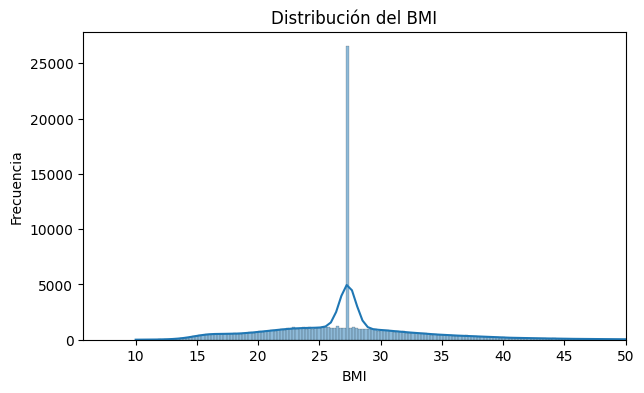

In [19]:
# Importamos las librerías.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.histplot(df["bmi"], kde=True)
plt.title("Distribución del BMI")
plt.xlabel("BMI")
plt.xlim(None, 50)
plt.ylabel("Frecuencia")
plt.show()


### 2. Boxplot (Detección de Outliers: Glucosa)

El boxplot permite identificar outliers mediante la visualización de los cuartiles y del rango intercuartílico. Vemos los valores atípicos en la variable **blood_glucose_level.**

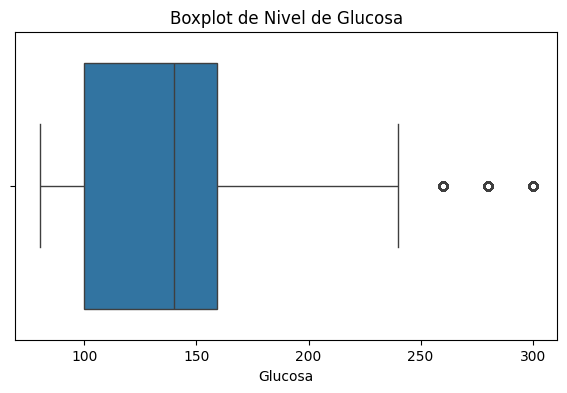

In [20]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["blood_glucose_level"])
plt.title("Boxplot de Nivel de Glucosa")
plt.xlabel("Glucosa")
plt.show()


### 3. Gráfico de Barras (Variable: Gender)

Este gráfico muestra la frecuencia de cada categoría de una variable cualitativa. Podemos observar cómo se distribuyen los valores de **gender**.

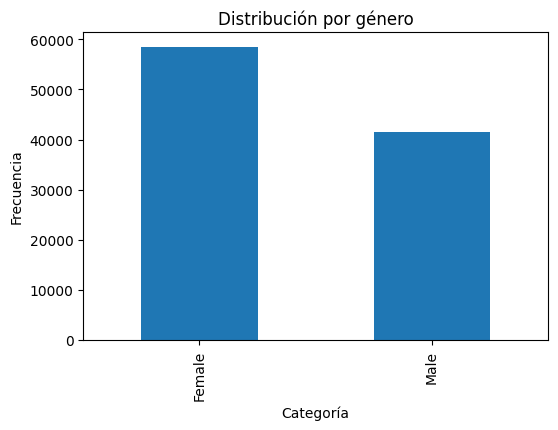

In [21]:
plt.figure(figsize=(6,4))
df["gender"].value_counts().drop("Other").plot(kind="bar")
plt.title("Distribución por género")
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.show()


# **7. SUBIR EL NOTEBOOK AL REPOSITORIO DE GITHUB.**

Finalmente, subiremos el notebook al repositorio clonado.  
Actualmente este notebook se encuentra solo en nuestro equipo local, debemos subir los cambios de la carpeta a GitHub.  

Para ello:

**`git status`**
Para ver el estado actual del repositorio:


**`git add .`**
Añade **todos los archivos modificados** del directorio al área de preparación.

**`git commit -m "comentario"`**
Permite ver el estado actual de los archivos que has añadido con `git add .`.

**`git pull`**
Actualiza tu repositorio local trayéndote los últimos cambios del repositorio en GitHub.

**`git push`**
Envía tus commits desde tu repositorio local al repositorio remoto.



